# Udacity Data Analyst Nanodegree P2: Investigate the Titanic Dataset

## Research question

This data analysis aims to answer the question "How did passenger class, age and gender influence the survival rate of the people aboard the Titanic?".

## Dataset

The dataset used in this analysis contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The data was sourced from the Kaggle website (https://www.kaggle.com/c/titanic/data) and provided by Udacity as a csv file ("titanic_data.csv").

In [1]:
import pandas as pd

titanic_passengers_df = pd.read_csv("titanic_data.csv")
titanic_passengers_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
len(titanic_passengers_df)

891

## Description

The dataset includes data from a sample of 981 passengers out of the population of 2224 passengers of the Titanic. The following description of the variables and notes are available on the Kaggle website.

VARIABLE DESCRIPTIONS:
- survival: Survival (0 = No; 1 = Yes)
- pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Data wrangling

The data wrangling process followed consists of:
- Selecting information fields relevant for the analysis: survivorship, name, class, sex and age
- Clean data by removing entries with missing age information

In [3]:
titanic_passengers_df = titanic_passengers_df[["Survived", "Name", "Pclass", "Sex", "Age"]]
titanic_passengers_df.head()

Survived                                               Name  Pclass  \
0         0                            Braund, Mr. Owen Harris       3   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2         1                             Heikkinen, Miss. Laina       3   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4         0                           Allen, Mr. William Henry       3   

      Sex   Age  
0    male  22.0  
1  female  38.0  
2  female  26.0  
3  female  35.0  
4    male  35.0

For the final sample, I selected the 714 passengers with known age using pandas notnull() function.

In [4]:
titanic_passengers_known_age_df = titanic_passengers_df[titanic_passengers_df["Age"].notnull()]
total_passengers = len(titanic_passengers_known_age_df)
total_passengers

714

## Exploration

In the data exploration phase, I will perform single-variable investigation of passenger survival, sex, age and class. I will also carry out multi-variable exploration of the following relationships: passenger sex and survival, passenger age and survival, passenger class and survival, and passenger sex, class and survival.

### Passenger survival variable

290 or 40.62% of 714 Titanic passengers in the sample survived the shipwreck.

In [5]:
survivors = titanic_passengers_known_age_df[["Survived"]].mean()
print str(round(survivors*100,2)) + "% of all the 714 Titanic passengers in the sample survived the shipwreck."
print "In absolute figures, " + str(int(round(survivors*total_passengers))) + \
" Titanic passengers survived the shipwreck while "\
+ str(int(round((1 - survivors)*total_passengers))) + " didn't survive it."

40.62% of all the 714 Titanic passengers in the sample survived the shipwreck.
In absolute figures, 290 Titanic passengers survived the shipwreck while 424 didn't survive it.


Populating the interactive namespace from numpy and matplotlib


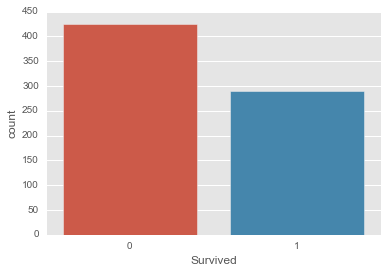

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')
sns.countplot(data=titanic_passengers_known_age_df,x="Survived")

### Passenger sex variable

Of the 714 passengers in the selected sample, 261 are female and 453 are male.

In [18]:
titanic_passengers_known_age_df[["Sex"]].squeeze().value_counts()

male      453
female    261
Name: Sex, dtype: int64

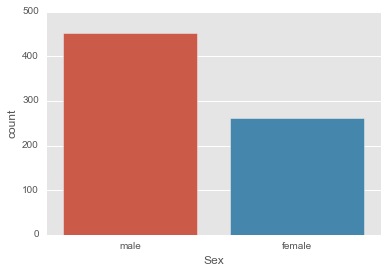

In [19]:
sns.countplot(data=titanic_passengers_known_age_df,x="Sex")

### Passenger age variable

The following observations can be made about the passenger age variable in the sample:
- The mean age is 29.70 years old;
- The median age, 28 years old, is close to the mean;
- Half the passengers in the sample is between the ages of 20.13 and 38;
- The minimum and maximum ages are 0.42 and 80.

In [20]:
titanic_passengers_known_age_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Passenger class variable

The following observations can be made about the passenger class variable in the sample:
- 355 passengers, or 49.72%, travelled third class;
- 186 passengers, or 26.05%, travelled first class;
- 173 passengers, or 24.23%, travelled second class.

In [21]:
class_totals = titanic_passengers_known_age_df[["Pclass"]].squeeze().value_counts()
class_totals

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [22]:
print "3rd class passengers are "+str(round(float(class_totals[3])/total_passengers,4)*100)+"% of the total sample."
print "1st class passengers are "+str(round(float(class_totals[1])/total_passengers,4)*100)+"% of the total sample."
print "2nd class passengers are "+str(round(float(class_totals[2])/total_passengers,4)*100)+"% of the total sample."

3rd class passengers are 49.72% of the total sample.
1st class passengers are 26.05% of the total sample.
2nd class passengers are 24.23% of the total sample.


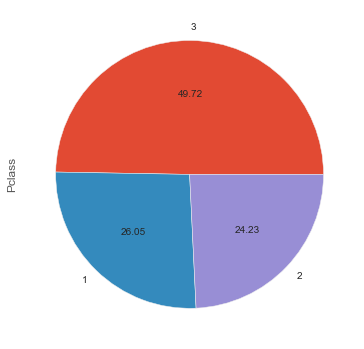

In [23]:
class_totals.plot.pie(figsize=(6, 6),autopct='%.2f')

### Passenger sex and survival relationship

75.48% of the 261 female passengers and 20.53% of 453 male passengers in the sample survived the shipwreck. This suggests that female passengers are related to a higher chance of survival overall. This observation will be tested for statistical significance in the section "Hypotheses and testing "below.

In [24]:
def survival_by_sex(x, sex):
    selected = x[x["Sex"] == sex]
    total = len(selected)
    survived = sum(selected["Survived"] == 1)
    percentage = float(survived)/total * 100
    return str(survived) + " of " + str(total) + " " + str(sex) + " passengers, or " + str(round(percentage,2))\
           + "%, survived the shipwreck."

print "Male passengers:", survival_by_sex(titanic_passengers_known_age_df, "male")
print "Female passengers:", survival_by_sex(titanic_passengers_known_age_df, "female")

Male passengers: 93 of 453 male passengers, or 20.53%, survived the shipwreck.
Female passengers: 197 of 261 female passengers, or 75.48%, survived the shipwreck.


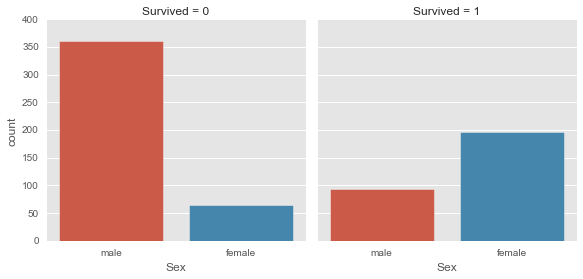

In [25]:
sns.factorplot(data=titanic_passengers_known_age_df,x="Sex", col="Survived", kind="count")
sns.plt.show()

### Passenger age and survival relationship

Infants aged 0-4 and passengers aged 15 - 39 had the highest survival rates.

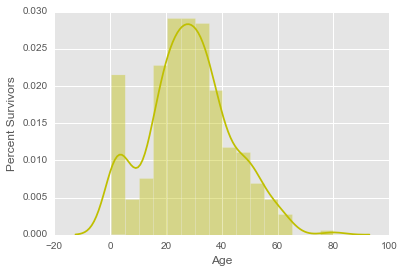

In [26]:
survivors_ages = titanic_passengers_known_age_df[titanic_passengers_known_age_df["Survived"] == 1]["Age"]
ax = sns.distplot(survivors_ages, color="y")
ax.set(xlabel='Age', ylabel='Percent Survivors')
sns.plt.show()

### Passenger class and survival relationship

Grouping the passenger data by class shows that 65.59% of first class passengers survived, against 47.98% of second class passengers and 23.94% of third class passengers. This allows us to observe that higher passenger classes may be related to higher chances of survival overall. This observation will be tested for statistical significance in the section "Hypotheses and testing" below.

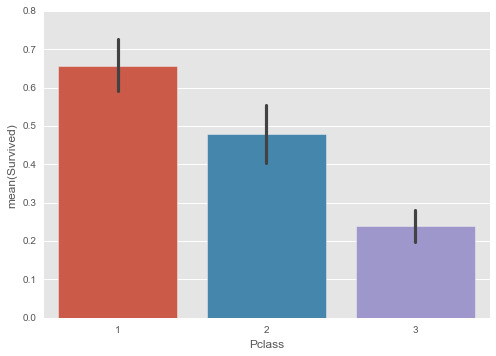

In [16]:
sns.barplot(data=titanic_passengers_known_age_df[["Survived", "Pclass"]], x="Pclass", y="Survived")
sns.plt.show()

In [32]:
titanic_passengers_known_age_df[["Survived", "Pclass", "Sex"]].groupby(by=["Pclass", "Sex"]).mean()

Survived
Pclass Sex             
1      female  0.964706
       male    0.396040
2      female  0.918919
       male    0.151515
3      female  0.460784
       male    0.150198

### Passenger sex, class and survival relationship

Splitting passenger class-wise survival by sex allows us to observe that:
- Status of first and second class female passengers is related to a higher mean survival rate than female passengers traveling in third class;
- Female passengers traveling in any of the three classes are related to a higher mean survival rate than men traveling in any class;
- Male passengers in first class are related to a higher mean survival rate than male passengers traveling in second and third class.

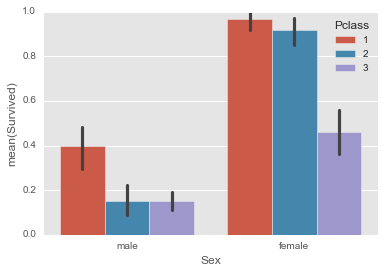

In [318]:
sns.barplot(data=titanic_passengers_known_age_df, x="Sex", y="Survived", hue="Pclass")
sns.plt.show()

## Hypotheses and testing

I will test the statistical significance of the following statements made during the data exploration phase:
- Female passengers are related to a higher survival rate than male passengers;
- Higher passenger classes are related to higher survival rates than lower classes.

In [319]:
from scipy.stats import ttest_ind_from_stats
from scipy.stats import f_oneway

### Hypotheses for passenger sex and survival relationship

To test the significance of female passengers being related to a higher survival rate than male passengers for the population of all Titanic passengers, we will set the following hypotheses:

- Ho: μF - μM = 0
- Ha: µF - µM ≠ 0

The null hypothesis, Ho, is that there is no significant difference in the mean survival rate for female and male passengers in the population.

The alternative hypothesis, Ha, is that there exists a significant difference in the mean survival rate for female and male passengers in the population.

### Testing passenger sex and survival relationship

To test the significance of the relationship between passenger sex and mean survival rate in the population of 2224 Titanic passengers, I will use a two-tailed independent samples t-test on the means of the samples of 261 female passengers and 453 male passengers.

#### Statistics for female passengers sample

In [320]:
female_passengers = titanic_passengers_known_age_df["Survived"][titanic_passengers_known_age_df["Sex"] == "female"]

In [321]:
mean_f = female_passengers.mean()
mean_f

0.7547892720306514

In [322]:
std_f = female_passengers.std()
std_f

0.4310386088809288

In [323]:
nobs_f = len(female_passengers)
nobs_f

261

#### Statistics for male passengers sample

In [324]:
male_passengers = titanic_passengers_known_age_df["Survived"][titanic_passengers_known_age_df["Sex"] == "male"]

In [325]:
mean_m = male_passengers.mean()
mean_m

0.2052980132450331

In [326]:
std_m = male_passengers.std()
std_m

0.4043657898055556

In [327]:
nobs_m = len(male_passengers)
nobs_m

453

#### T-test for independent samples from statistics 

In [328]:
ttest_ind_from_stats(mean_f, std_f, nobs_f, mean_m, std_m, nobs_m, equal_var=False)

Ttest_indResult(statistic=16.776435647064584, pvalue=1.0533924283901263e-50)

#### T distribution critical value

T-critical < 3.300 (two-tailed test, significance level at .001, df = 712)

#### Conclusion

Based on the t statistic from the samples, we reject the null hypothesis for the population - i.e. that the female and male mean survival rates are not significantly different - with 99.9% confidence.

### Hypotheses for passenger class and survival relationship

To test the significance of the differences between mean survival rates for first, second and third class passengers for the population of all Titanic passengers, we will set the following hypotheses:

- Ho: μ1 = μ2 = μ3
- Ha: µ1 ≠ µ2 ≠ μ3

The null hypothesis, Ho, is that there is no significant difference in the mean survival rate for first, second and third class passengers in the population.

The alternative hypothesis, Ha, is that there is significant difference in the mean survival rate for first, second and third class passengers in the population.

### Testing passenger class and survival relationship

To test the significance of the relationship between passenger passenger class and mean survival rate in the population of 2224 Titanic passengers, I will use a one-way ANOVA on the means of the samples of first, second and third class passengers.

#### Survival data by passenger class

In [329]:
first_class = titanic_passengers_known_age_df["Survived"][titanic_passengers_known_age_df["Pclass"] == 1].squeeze()

In [330]:
second_class = titanic_passengers_known_age_df["Survived"][titanic_passengers_known_age_df["Pclass"] == 2].squeeze()

In [331]:
third_class = titanic_passengers_known_age_df["Survived"][titanic_passengers_known_age_df["Pclass"] == 3].squeeze()

#### F statistics for one-way ANOVA

In [332]:
f_oneway(first_class, second_class, third_class)

F_onewayResult(statistic=53.174254029665548, pvalue=3.0120145996783809e-22)

#### F distribution critical value

F-critical < 4.787 (two-tailed test, significance level at .001, df1 = 2, df2 = 711)

#### Conclusion

Based on the f statistic from the samples, we reject the null hypothesis for the population - i.e. that the first, second and thrid passenger class mean survival rates are not significantly different - with 99.9% confidence.

## Conclusions

#### Summary

This data analysis set out to explore how passenger class, age and gender influence the survival rate of the people aboard the Titanic?". I have performed single- and multi-variable explorations of the variables passenger survival, sex, age and class. The two questions that I then focused on - and tested for statistical significance - were:
- Are female passengers related to a higher survival rate than male passengers overall?
- Are higher passenger classes related to higher survival rates than lower classes overall?

The statistical tests performed have led to drawing the following conclusions:
- The status of female passenger is related to significanly higher survival rate;
- There is significant difference between the survival rates of passengers of different classes.

#### Statistical tests

To validate the statistical significance of the relationships between sex and survival and class and survival in the population, I conducted an two-tailed independent samples t-test and a one-way ANOVA on the sample means. Both tests led to rejecting the null hypotheses with a confidence of 99.9%. 

In future research, additional statistical tests can be carried out to avaluate the significance of relationships between multiple variables.

#### Limitations

Some of the limitations of the current analysis - and suggestions for further research - are the following:
- The data with missing (i.e. NaN) age values were excluded from the analyis;
- The scope of this analysis is limited to answering basic questions about signicance of sex and class for passenger survival. Further statistical analysis can be performed on the relationships between multiple variables;
- More statistical tests could be performed to validate significance of relationships between multiple variables.

## Resources

- http://docs.statwing.com/examples-and-definitions/t-test/
- https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
- http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html#scipy.stats.ttest_ind_from_stats
- http://www.socr.ucla.edu/applets.dir/f_table.html
- http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway